## 6.- Using fillna

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd


In [8]:
# ----function to get symbol's path
def symbol_to_path(symbol, base_dir=""):
  """Return CSV file path given ticker symbil."""
  return os.path.join("{}.csv".format(str(symbol)))

In [19]:
# ----Read csv
def get_data(symbolist, dates):
  df_final=pd.DataFrame(index=dates)
  if "SPY" not in symbollist:
    symbollist.insert(0, "SPY")
  for symbol in symbollist:
    file_path = symbol_to_path(symbol)
    df_temp = pd.read_csv(file_path, parse_dates=True, index_col="Date",
            usecols=["Date", "Adj Close"], na_values=["nan"])
    df_temp = df_temp.rename(columns={'Adj Close':symbol})
    df_final = df_final.join(df_temp)
    if symbol == "SPY":
      df_final = df_final.dropna(subset=["SPY"])
  return df_final

In [4]:
# ---- plot function
def plot(df_data):
  ax = df_data.plot(title = "Incomplete Data", fontsize=2)
  ax.set_xlabel("Date")
  ax.set_ylabel("Price")
  plt.show()

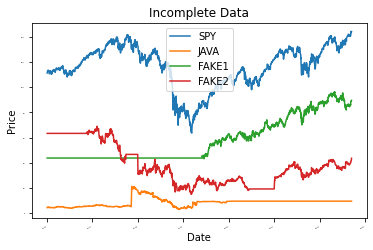

In [22]:
if __name__ == '__main__':
  # list of symbols
  # symbollist=["PSX", "FAKE1", "FAKE2"]
  symbollist = ["JAVA", "FAKE1", "FAKE2"]
  #date range
  start_date='2005-12-31'
  end_date='2014-12-07'
  #create date range
  idx=pd.date_range(start_date, end_date)
  # get adjusted close of each symbol
  df_data=get_data(symbollist, idx)
  df_data.fillna(method='ffill', inplace = True) # Forward fill
  df_data.fillna(method='bfill', inplace = True) # Backward fill
  plot(df_data)